## Creating ROC
Want to create some ROC curves. First from SDSS stuff I did before I got here and then from my Hubble stuff.

In [58]:
import pandas as pd
import numpy as np
import os

In [6]:
folder = 'C:/Users/oryan/Documents/zoobot_new'

In [10]:
predictions = pd.read_csv(f'{folder}/predictions/gz2-predictions.csv')

In [33]:
predictions

,prediction,image_loc,binary_prediction
0,0.524274,/mmfs1/home/users/oryan/Zoobot/data/training_c...,1
1,0.498632,/mmfs1/home/users/oryan/Zoobot/data/training_c...,0
2,0.487720,/mmfs1/home/users/oryan/Zoobot/data/training_c...,0
3,0.483957,/mmfs1/home/users/oryan/Zoobot/data/training_c...,0
4,0.480766,/mmfs1/home/users/oryan/Zoobot/data/training_c...,0
...,...,...,...
495,0.502055,/mmfs1/home/users/oryan/Zoobot/data/training_c...,1
496,0.453330,/mmfs1/home/users/oryan/Zoobot/data/training_c...,0
497,0.456780,/mmfs1/home/users/oryan/Zoobot/data/training_c...,0
498,0.493347,/mmfs1/home/users/oryan/Zoobot/data/training_c...,0


In [31]:
manifest = pd.read_csv(f'{folder}/manifests/training-manifest-hec.csv',index_col=0)

In [39]:
manifest

,id_str,RA,DEC,merging_merger,file_loc
0,587724197207212176,01:30:37.76,+13:12:52.0,1,/mmfs1/home/users/oryan/Zoobot/data/training_c...
1,587731512073650262,01:58:16.35,-00:31:18.8,1,/mmfs1/home/users/oryan/Zoobot/data/training_c...
2,587738195036799112,07:34:03.45,+43:32:41.3,1,/mmfs1/home/users/oryan/Zoobot/data/training_c...
3,587732156315402630,07:57:33.42,+25:34:36.5,1,/mmfs1/home/users/oryan/Zoobot/data/training_c...
4,587728669878845746,08:04:22.68,+40:38:55.9,1,/mmfs1/home/users/oryan/Zoobot/data/training_c...
...,...,...,...,...,...
995,587741392109895883,09:40:10.78,+26:31:41.2,0,/mmfs1/home/users/oryan/Zoobot/data/training_c...
996,587728905564389735,08:02:24.10,+36:08:53.6,0,/mmfs1/home/users/oryan/Zoobot/data/training_c...
997,588017723866218632,12:43:48.13,+06:14:30.1,0,/mmfs1/home/users/oryan/Zoobot/data/training_c...
998,587734863219130540,10:06:46.33,+08:36:23.5,0,/mmfs1/home/users/oryan/Zoobot/data/training_c...


## Organising and Merging

In [45]:
predictions_id = predictions.assign(id_str = predictions.image_loc.apply(lambda x: int(os.path.basename(x).replace('.png',''))))

In [46]:
predictions_id

,prediction,image_loc,binary_prediction,id_str
0,0.524274,/mmfs1/home/users/oryan/Zoobot/data/training_c...,1,588848900438819110
1,0.498632,/mmfs1/home/users/oryan/Zoobot/data/training_c...,0,587725817483624650
2,0.487720,/mmfs1/home/users/oryan/Zoobot/data/training_c...,0,587734948593533080
3,0.483957,/mmfs1/home/users/oryan/Zoobot/data/training_c...,0,587730772804108549
4,0.480766,/mmfs1/home/users/oryan/Zoobot/data/training_c...,0,587729651810631989
...,...,...,...,...
495,0.502055,/mmfs1/home/users/oryan/Zoobot/data/training_c...,1,587741392109895883
496,0.453330,/mmfs1/home/users/oryan/Zoobot/data/training_c...,0,587728905564389735
497,0.456780,/mmfs1/home/users/oryan/Zoobot/data/training_c...,0,588017723866218632
498,0.493347,/mmfs1/home/users/oryan/Zoobot/data/training_c...,0,587734863219130540


In [48]:
merged = predictions_id.merge(manifest, on='id_str',how='left')

In [54]:
merged

,prediction,image_loc,binary_prediction,id_str,RA,DEC,merging_merger,file_loc
0,0.524274,/mmfs1/home/users/oryan/Zoobot/data/training_c...,1,588848900438819110,10:22:18.63,+00:23:13.4,0,/mmfs1/home/users/oryan/Zoobot/data/training_c...
1,0.498632,/mmfs1/home/users/oryan/Zoobot/data/training_c...,0,587725817483624650,10:54:54.27,+66:01:44.3,0,/mmfs1/home/users/oryan/Zoobot/data/training_c...
2,0.487720,/mmfs1/home/users/oryan/Zoobot/data/training_c...,0,587734948593533080,10:24:53.85,+10:39:31.7,0,/mmfs1/home/users/oryan/Zoobot/data/training_c...
3,0.483957,/mmfs1/home/users/oryan/Zoobot/data/training_c...,0,587730772804108549,22:17:52.63,+11:54:01.3,0,/mmfs1/home/users/oryan/Zoobot/data/training_c...
4,0.480766,/mmfs1/home/users/oryan/Zoobot/data/training_c...,0,587729651810631989,16:23:26.65,+41:41:40.1,0,/mmfs1/home/users/oryan/Zoobot/data/training_c...
...,...,...,...,...,...,...,...,...
495,0.502055,/mmfs1/home/users/oryan/Zoobot/data/training_c...,1,587741392109895883,09:40:10.78,+26:31:41.2,0,/mmfs1/home/users/oryan/Zoobot/data/training_c...
496,0.453330,/mmfs1/home/users/oryan/Zoobot/data/training_c...,0,587728905564389735,08:02:24.10,+36:08:53.6,0,/mmfs1/home/users/oryan/Zoobot/data/training_c...
497,0.456780,/mmfs1/home/users/oryan/Zoobot/data/training_c...,0,588017723866218632,12:43:48.13,+06:14:30.1,0,/mmfs1/home/users/oryan/Zoobot/data/training_c...
498,0.493347,/mmfs1/home/users/oryan/Zoobot/data/training_c...,0,587734863219130540,10:06:46.33,+08:36:23.5,0,/mmfs1/home/users/oryan/Zoobot/data/training_c...


In [50]:
merged.query('binary_prediction != merging_merger')

,prediction,image_loc,binary_prediction,id_str,RA,DEC,merging_merger,file_loc
0,0.524274,/mmfs1/home/users/oryan/Zoobot/data/training_c...,1,588848900438819110,10:22:18.63,+00:23:13.4,0,/mmfs1/home/users/oryan/Zoobot/data/training_c...
8,0.509988,/mmfs1/home/users/oryan/Zoobot/data/training_c...,1,587739845916885097,13:58:06.12,+23:44:44.7,0,/mmfs1/home/users/oryan/Zoobot/data/training_c...
10,0.510970,/mmfs1/home/users/oryan/Zoobot/data/training_c...,1,587739130804568115,13:36:37.93,+34:53:21.9,0,/mmfs1/home/users/oryan/Zoobot/data/training_c...
14,0.502962,/mmfs1/home/users/oryan/Zoobot/data/training_c...,1,587732770524954731,13:08:15.04,+09:04:57.9,0,/mmfs1/home/users/oryan/Zoobot/data/training_c...
18,0.508206,/mmfs1/home/users/oryan/Zoobot/data/training_c...,1,587733442123989092,16:11:01.63,+40:45:24.9,0,/mmfs1/home/users/oryan/Zoobot/data/training_c...
...,...,...,...,...,...,...,...,...
486,0.503937,/mmfs1/home/users/oryan/Zoobot/data/training_c...,1,587735696440492157,11:24:33.18,+56:49:49.6,0,/mmfs1/home/users/oryan/Zoobot/data/training_c...
489,0.531512,/mmfs1/home/users/oryan/Zoobot/data/training_c...,1,587725551752249530,13:26:26.85,+66:40:53.5,0,/mmfs1/home/users/oryan/Zoobot/data/training_c...
492,0.520888,/mmfs1/home/users/oryan/Zoobot/data/training_c...,1,588009365863268418,09:27:31.53,+53:14:40.5,0,/mmfs1/home/users/oryan/Zoobot/data/training_c...
493,0.510359,/mmfs1/home/users/oryan/Zoobot/data/training_c...,1,587737825140605132,08:22:04.62,+52:45:55.9,0,/mmfs1/home/users/oryan/Zoobot/data/training_c...


In [56]:
(500 - 133)/500

0.734

In [82]:
cutoff_range = np.linspace(0.40,0.60,2500)

In [83]:
merged_red = merged[['prediction','merging_merger']]

In [84]:
merged_red

,prediction,merging_merger
0,0.524274,0
1,0.498632,0
2,0.487720,0
3,0.483957,0
4,0.480766,0
...,...,...
495,0.502055,0
496,0.453330,0
497,0.456780,0
498,0.493347,0


In [85]:
def get_accuracy(df, cut):
    df_pred = df.assign(binary_prediction = df.prediction.apply(lambda x: 0 if x <= cut else 1))
    wrong_df = df_pred.query('binary_prediction != merging_merger')
    accuracy = len(wrong_df)/len(df_pred)
    return accuracy

In [86]:
accuracy = {}
for i in range(len(cutoff_range)):
    accuracy[cutoff_range[i]] = [get_accuracy(merged_red, cutoff_range[i])]

In [87]:
roc_df = (
    pd.DataFrame(accuracy)
    .T
    .reset_index()
    .rename(columns={'index':'binary_cut',0:'Accuracy'})
)

<AxesSubplot:title={'center':'Accuracy vs Cut in SDSS Example'}, xlabel='Prediction Cutoff', ylabel='Accuracy'>

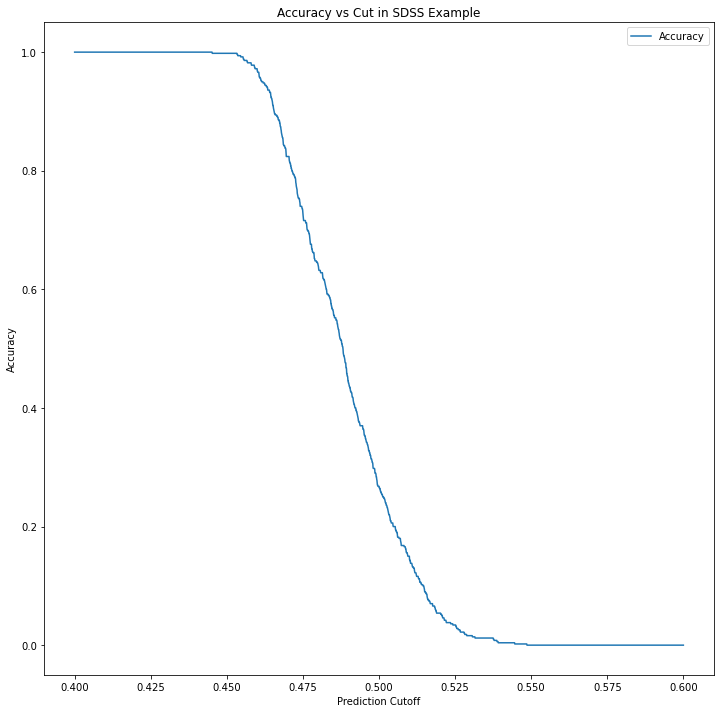

In [92]:
roc_df.plot(x='binary_cut',y='Accuracy',figsize=(12,12),xlabel='Prediction Cutoff',ylabel='Accuracy',title='Accuracy vs Cut in SDSS Example')

Note, this is not exactly the best example... None of the galaxies that I gave it were actually interacting galaxies to classify. I now have the code though! So, can utilise this when my Hubble stuff comes in. 